###### HCIA-AI  Machune Learning CLass Practicals as taught to me by
Engr. Francis T. Umeudu

# INTRODUCTION TO MACHINE LEARNING
Machine Learning is the process through which computers make decisions based on what it has learnt from an existing data.
According to CodeBasics, Machine Learning is a set of techniques to make computers better at doing things that humans(traditionally), can do better than machine.

It involves the steps taken to train computers to learn patterns from existing data and make predictions or inferences on new data based on what it has learnt from the existing data. Machine Learning is a step into the direction of AI.
Some common examples of Machine Learning at work include the ability of computers to distinguish real e-mails from spam, tweet recommendation based on your previous activities on Twitter, movies recommendation by Netflix and Youtube etc.

Machine Learning is a great way to automate time-consuming or expensive manual tasks.


#### Types of Machine Learning
- **Supervised Learning**

- **Unsupervised Learning**

Supervised and Unspervised Machine Learning are the two most common types of Machine Learning paradigms used in Data Science. The difference between them lies majorly in the their training data.

In **Supervised Learning**, the training or input data is labeled such that we are able to tell what the output data is but in **Unsupervised Leraning**, the input data is unlabeled.

In [1]:
from google.colab import drive
drive.mount('/content/drive')   # if you are using Jupyter notebook, you will not need this at all

Mounted at /content/drive


## SUPERVISED LEARNING
Supervised learning is a machine learning approach that is characterized by the use of labeled datasets. Here, a data set that contains predictor features and a target feature is provided (the predictor features are the independent variables while the target feature is the dependent variable). The predictor describes a situation or an entity while the target feature is the event or variable that we are trying to predict. eg. If we are trying to predict a person's **SALARY** based on variables like **WORK EXPERIENCE, EDUCAIONAL QUALIFICATION and INSTITUTION TYPE**, Our target variable will be **SALARY** while **WORK EXPERIENCE, EDUCAIONAL QUALIFICATION and INSTITUTION TYPE** are our predictors.In Supervised Learning, the datasets are mostly presented in a tabular form ie in rows and columns. Each row is known as an observation.
Supervised Learning can be categorized into
- Regression and
- Classification

### REGRESSION
Regression is a supervised learning method used to determine the correlation between a dependent variable and one or more independent variables. It is very popular in Machine Learning because of it's versatility in solving problems.
It can to reveal both positive and negative relationship. In a positive relationship, when the independent variable goes up, the dependent variable goes up. When the independent variable goes up, the dependent variable comes down. Examples of the application of Regression include forecasting the price of stock, understanding the impact of a marketing campaign of sales and forecasting the weather. Some popular Regression algorithims in Machine Learning are:

- Linear Regression
- Polynomial Regression

#### Linear Regression
Linear Regression is divided into:
- Simple Linear Regression
- Multiple Linear Regression

**Simple Linear Regression** is used to find the correlation between two variables only, one independent variable and one dependent variable. Simple Linear Regression uses the relationship between the data points to draw a straight line through them.
The dependent variable is the target feature i.e the value we want to find, explain or forecast. This variable is denoted as y and is found on the vertical axis when visualized of a scatter plot.
The independent variable is the predictor, the variable that provides information used to explain or forecast the dependent variable. This variable is denoted as X and is found on the horizontal axis of the scatter plot.
The formular for Simple Linear Regression is:

**y = a + bx**

Where:

- y = the dependent variable
- a = the intercept or the constant
- b = the slope or coefficient of the independent variable
- x = the independent variable


**Multiple Linear Regression** involves finding the correlation between more that one independent variables and a dependent variable. This is also called a Multivariate Regression.

In the next steps, we will solve a Machine Learning problem using the Regression model:

We are going to build a model that will be used to predict the price of laptops, we will start by learning about the steps to get our data ready for a regression model.


### LOADING DATA

In [ ]:
#importing the library for loading the data
import pandas as pd
import numpy as np

In [ ]:
# Define the path to your dataset in Google Drive
data_dir = '/content/drive/MyDrive/DATA SCIENCE WITH PYTHON'
dataset_path = f'{data_dir}/laptop_price.csv'   # Also if you are using Jupyter notebook offline, you wont need this
# for example, just use something like this
#laptop_price = pd.read_csv('laptop_price.csv') # make sure the data is in the same folder or you can reference the full path to the dataset

In [ ]:
# Step 2: Load the dataset into a Pandas DataFrame
import pandas as pd
import numpy as np
laptop_price  = pd.read_csv(dataset_path)


In [ ]:
# to view the first five rows of the data
laptop_price.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# to know the number of rows and columns in the data
laptop_price.shape

(1303, 13)

In [ ]:
# to get an overview of the data
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# to check the number of unique values in each column
laptop_price.nunique()

,0
laptop_ID,1303
Company,19
Product,618
TypeName,6
Inches,18
ScreenResolution,40
Cpu,118
Ram,9
Memory,39
Gpu,110


In [ ]:
# to get the statistics of the numerical columns
laptop_price.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
# Checking for duplicate values
laptop_price.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for null values
laptop_price.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In the next step, the unique function will be used to retrieve the unique values for all columns. This will help us to closely inspect the values in each column and also spot any form of data inconsistency.

In [ ]:
laptop_price['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
laptop_price['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [ ]:
laptop_price['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
laptop_price['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [ ]:
laptop_price['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [ ]:
laptop_price['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [ ]:
laptop_price['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

I have noticed the 'GB' value in the Ram column, that will be removed to enable me convert this column to a numeric column.

In [ ]:
# To remove the gb
laptop_price['Ram'] = laptop_price['Ram'].str.replace("GB","")

In [ ]:
# to convert to numeric data
laptop_price['Ram'] = pd.to_numeric(laptop_price['Ram'])

Since the gb value has been removed, I will rename my column to show that the Ram is measured in GB

In [ ]:
laptop_price.rename(columns={"Ram": "Ram_GB"}, inplace=True)

In [ ]:
laptop_price['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
laptop_price['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [ ]:
laptop_price['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
laptop_price['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [ ]:
# to remove the kg values in order to allow for easy conversion of data to numerica data
laptop_price['Weight'] = laptop_price['Weight'].str.replace("kg","")

In [ ]:
# converting data to numeric
laptop_price['Weight'] = pd.to_numeric(laptop_price['Weight'])

In [ ]:
# to rename column to show that weight measurement is in kg
laptop_price.rename(columns={"Weight": "Weight_kg"}, inplace=True)

In [ ]:
# deleting laptop_ID column, this feature is considered irrelevant to this project
laptop_price.drop('laptop_ID', axis =1, inplace = True)

### EXPLORATORY DATA ANALYSIS

In [ ]:
# to import data visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#

Which company makes the most expensive laptops?

In [ ]:
avg_price = laptop_price.groupby('Company')[['Price_euros']].mean().sort_values(by = 'Price_euros', ascending = False).head(10)
avg_price

,Price_euros
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


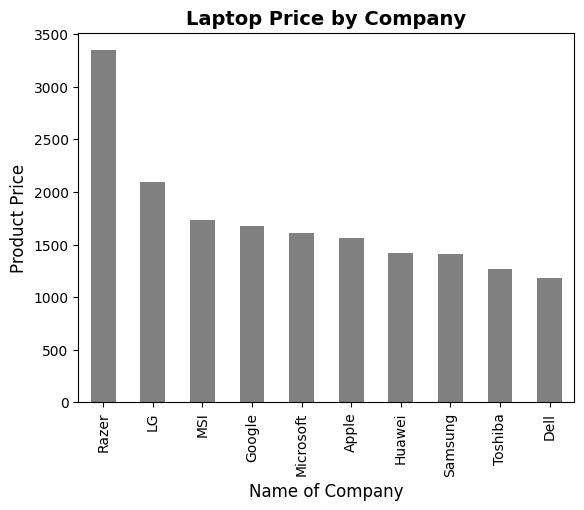

In [ ]:
# to plot result in a chart
avg_price.plot(kind ='bar', legend = False, color = 'grey')
plt.title('Laptop Price by Company', fontweight = 'bold', fontsize = 14)
plt.xlabel('Name of Company', fontsize = 12)
plt.ylabel('Product Price', fontsize = 12)
plt.show();


What memory size is the most expensive?

In [ ]:
memory_size = laptop_price.groupby('Memory')[['Price_euros']].mean().sort_values(by = 'Price_euros', ascending = False).head(10)
memory_size

,Price_euros
Memory,
1TB SSD + 1TB HDD,3624.100000
512GB SSD + 1.0TB Hybrid,3240.000000
240GB SSD,3100.000000
1TB SSD,3072.000000
256GB SSD + 1.0TB Hybrid,2749.990000
512GB SSD + 1TB HDD,2500.447143
8GB SSD,2249.000000
64GB Flash Storage + 1TB HDD,1993.000000
512GB SSD,1860.811017


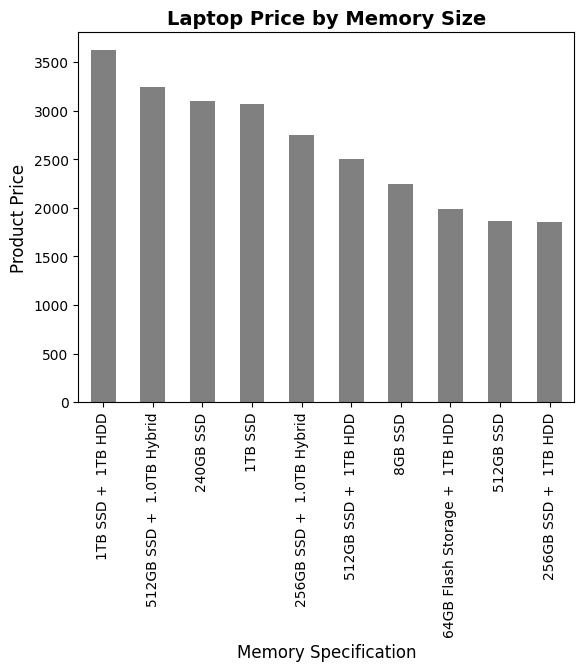

In [ ]:
# to plot result in a chart
memory_size.plot(kind ='bar', legend = False, color = 'grey')
plt.title('Laptop Price by Memory Size', fontweight = 'bold', fontsize = 14)
plt.xlabel('Memory Specification', fontsize = 12)
plt.ylabel('Product Price', fontsize = 12)
plt.show();


What memory size is the most expensive?

In [ ]:
cpu = laptop_price.groupby('Cpu')[['Price_euros']].mean().sort_values(by = 'Price_euros', ascending = False).head(10)
cpu

,Price_euros
Cpu,
Intel Xeon E3-1535M v6 3.1GHz,4899.000000
Intel Xeon E3-1535M v5 2.9GHz,4389.000000
Intel Core i7 7820HK 2.9GHz,3832.678571
Intel Core i7 2.9GHz,2858.000000
Intel Core i7 6920HQ 2.9GHz,2799.000000
Intel Core i7 6820HK 2.7GHz,2555.763000
Intel Core i7 2.7GHz,2537.450000
Intel Xeon E3-1505M V6 3GHz,2524.000000
Intel Core i7 2.8GHz,2439.970000


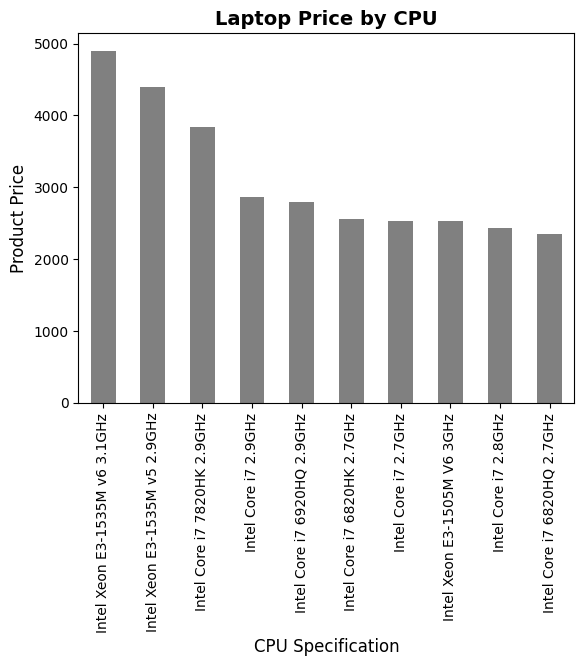

In [ ]:
# to plot result in a chart
cpu.plot(kind ='bar', legend = False, color = 'grey')
plt.title('Laptop Price by CPU', fontweight = 'bold', fontsize = 14)
plt.xlabel('CPU Specification', fontsize = 12)
plt.ylabel('Product Price', fontsize = 12)
plt.show();


### FEATURE ENGINEERING
This is the process of manipulating and transforming data into a format that is usable for the machine learning model.

#### HANDLING CATEGORICAL DATA
The first step of feature engineering is the conversion of categorical data into numbers. Regression model does not work with categorical data because of the mathematical computation that happens in the background.
There are many ways to encode the categorical data. They include:
- **LABEL ENCODING:**  This type of encodinf assigns 0 to the max number of unique values in the categorical column minus 1. This means that if we have 10 unique values, the type of encoding will assign 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 to the unique values. The assignment is done in an alphabetical order. Assuming the unique values are blue, green, red, yellow, gold, purple, white, black, pink and orange. 0 will be assigned to Black, 1 to Blue, 2 to Gold, 3 to Green, 4 to Orange, 5 to Pink, 6 to Purple, 7 to Red, 8 to White, 9 to Yellow. Label Encoding is best used for nominal data, i.e when there is no order in the data.
- **ORDINAL ENCODING:** Ordinal encoding is used to convert ordnal categorical data into numbers. An order is assigned to the values.
- **ONE HOT ENCODING:** One-Hot encoding is the proccess of representing categorical data in the form of binary numbers. It is used to represent qualitative values in regression. One hot encoding creates a column for each unique value in a categorical column and assigns binary numbers of zero and one. When encoding, it is advisable to delete one of the dummy variable columns. This helps avoid what is known as dummy variable trap.
- **FREQUENCY ENCODING:** Frequency or count encoding counts the number of times a data item appears in a columnn and assigns that number as the encoded value of the data item. eg. if we have a categorical columns that contains Lagos, Portharcourt, Lagos, Owerri, Lagos, Portharcourt, Abuja, Lagos and Abuja, Lagos will be encoded as 4 because it appears 4 times while Portharcourt will be encoded as 2. The problem with this encoding method arises when we have different data items with the same frequency distribution eg. Abuja appears twice as well, meaning that Abuja will be encoded as 2 as well as Portharcourt. This will make it difficult for us to spot the difference between both unique values.


To know the encoding type to use, it is important to understand the type of categorical variables your dataset has. Whether the categorical data is ordinal or nominal must be considered.  

#### TYPES OF CATEGORICAL DATA
Qualitative data also known as categorical data describes the characteristics of a data object. Examples of Qualitative data are color, gender, races, educational qualification etc. Qualitative data are mostly expressed as text, they can however be encoded as numbers. Gender data like Male and Female can be expressed as 0 and 1 where 0 is male and 1 is female or vice versa. This doesn’t change the gender data to a quantitative data. The zip code of a city is a qualitative data irrespective of the fact that it is expressed as a number.
Qualitative data is subdivided into:
•	Ordinal Data
•	Nominal Data

Ordinal Data: This describes categorical data that can be ordered e.g., educational qualification.

Nominal Data: This is a type of categorical data that has no meaningful order. E.g., color of a dress.

Another important point to consider while encoding categorical data is the cardinality of the variable. A variable with high cardinality will result in curse of dimensionality if one hot encoding is applied. It becomes advisible to make use of label encoding if the variable is nominal.

In [ ]:
# to import the label encoder module
from sklearn import preprocessing

# to create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# applying to the categorical columns
laptop_price['Company'] = label_encoder.fit_transform(laptop_price['Company'])
laptop_price['Product'] = label_encoder.fit_transform(laptop_price['Product'])
laptop_price['TypeName'] = label_encoder.fit_transform(laptop_price['TypeName'])
laptop_price['ScreenResolution'] = label_encoder.fit_transform(laptop_price['ScreenResolution'])
laptop_price['Cpu'] = label_encoder.fit_transform(laptop_price['Cpu'])
laptop_price['Memory'] = label_encoder.fit_transform(laptop_price['Memory'])
laptop_price['Gpu'] = label_encoder.fit_transform(laptop_price['Gpu'])
laptop_price['OpSys'] = label_encoder.fit_transform(laptop_price['OpSys'])

#### MULTICOLINEARITY TESTING
Multicollinearity describes a statistical situation in which independent variables are highly correlated with each other. Before fitting a regression model, it is advisable to remove highly correlated independent variables especially if the interest us to determine how each independent variable relates with the dependent variable individually. If this is not done, the individual effect becomes skewed. The standard error of the affected variables will become high as well as the P-Value.  

In [ ]:
# Creating a correlation matrix
multi_check_matrix = laptop_price.corr()
multi_check_matrix

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
Company,1.000000,0.067234,-0.007718,-0.085784,0.094772,0.044593,0.046508,0.048086,0.026537,0.134290,-0.129610,0.140371
Product,0.067234,1.000000,0.065529,-0.218979,0.176456,0.143916,0.019979,0.088700,0.094810,0.120596,-0.249035,0.139339
TypeName,-0.007718,0.065529,1.000000,-0.077428,-0.175618,-0.128174,-0.242862,0.019091,-0.204774,0.085223,-0.267002,-0.127313
Inches,-0.085784,-0.218979,-0.077428,1.000000,-0.247841,0.153041,0.237993,-0.193382,0.215710,0.034528,0.827631,0.068197
ScreenResolution,0.094772,0.176456,-0.175618,-0.247841,1.000000,0.232751,0.238280,0.059042,0.160816,0.070360,-0.135653,0.331327
Cpu,0.044593,0.143916,-0.128174,0.153041,0.232751,1.000000,0.468942,-0.013264,0.490761,0.125374,0.189229,0.529334
Ram_GB,0.046508,0.019979,-0.242862,0.237993,0.238280,0.468942,1.000000,0.151801,0.393280,0.139367,0.383874,0.743007
Memory,0.048086,0.088700,0.019091,-0.193382,0.059042,-0.013264,0.151801,1.000000,-0.020784,0.035574,-0.167431,0.185680
Gpu,0.026537,0.094810,-0.204774,0.215710,0.160816,0.490761,0.393280,-0.020784,1.000000,0.103853,0.336199,0.443299
OpSys,0.134290,0.120596,0.085223,0.034528,0.070360,0.125374,0.139367,0.035574,0.103853,1.000000,0.006480,0.288911


<Axes: >

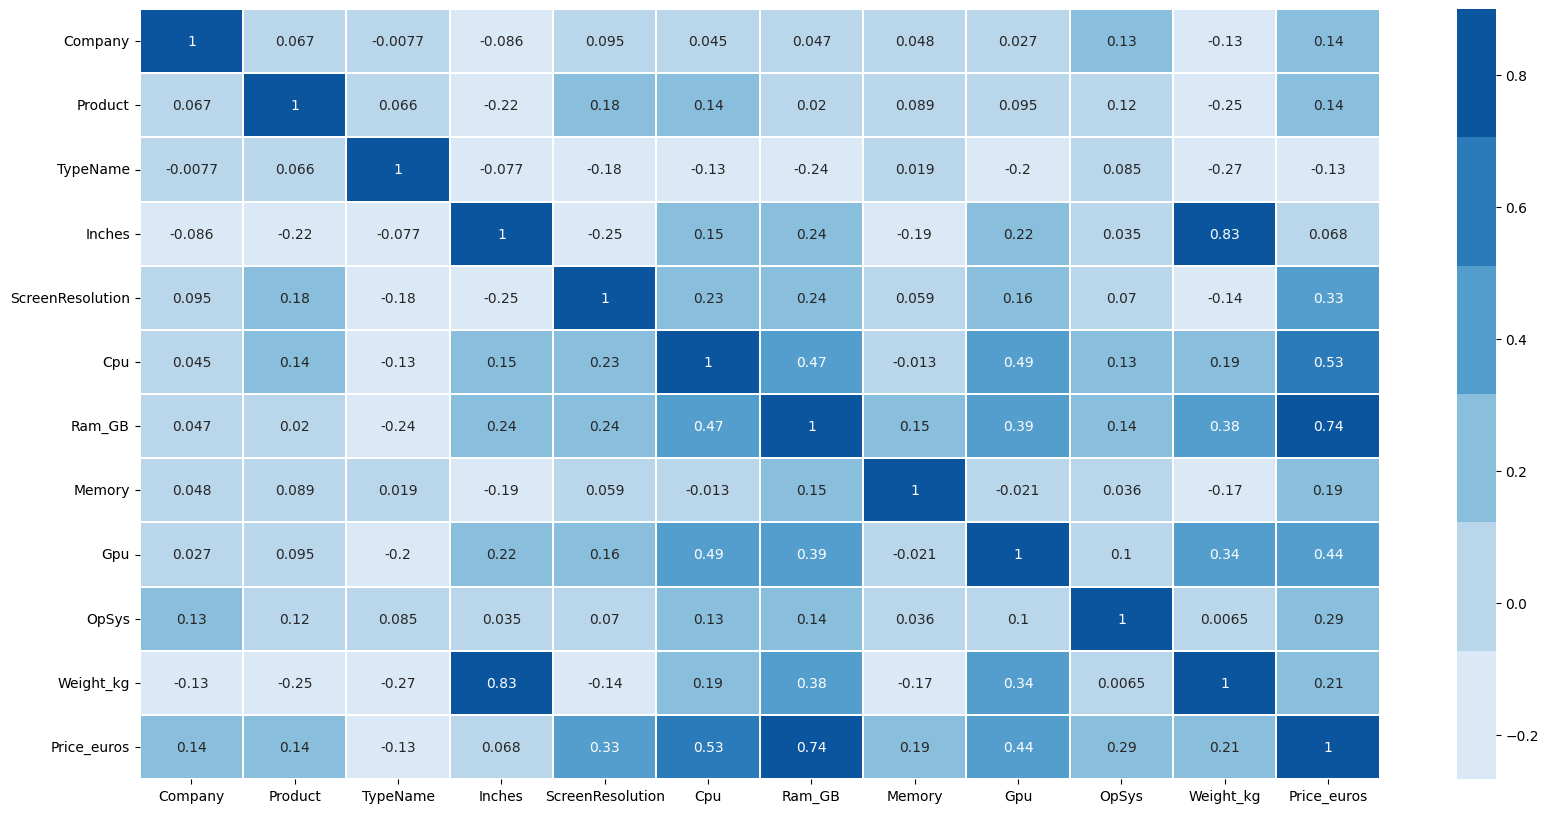

In [ ]:
# To visualize the correlation matrix in a Heatmap
plt.figure(figsize=(20,10))
colormap = sns.color_palette("Blues")
sns.heatmap(multi_check_matrix, cmap=colormap, vmax=0.9, annot=True, linecolor="white", linewidths=0.02)

In [ ]:
# Varaince inflation factor module

from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(dataframe):
    VIF = pd.DataFrame()
    VIF["features"] = dataframe.columns
    VIF["VIF_values"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return(VIF)




In [ ]:
# Applying to our dataframe

compute_vif(laptop_price).sort_values(by = 'VIF_values', ascending = False)

,features,VIF_values
3,Inches,98.239221
10,Weight_kg,32.379766
9,OpSys,25.066281
5,Cpu,17.186355
8,Gpu,11.334809
11,Price_euros,10.961871
6,Ram_GB,10.021781
2,TypeName,6.578461
7,Memory,5.517444
1,Product,4.827253


In [ ]:
#deletin feature that are highly correlates

laptop_price.drop(['Inches'], axis = 1, inplace= True)

#### FEATURE SCALING
The next feature engineering step performed on this data is the scaling of features. This puts the numeric values in the same range. An unscaled data can impair the model's ability to accurately make predictions. Feature scaling is necessary for Machine Learning algorithms that base on gradient descent to minimise the error between the predicted and actual values. Therefore in Linear Regression, it is importatnt to scale the data so that the gradient descent moves smoothly and quickly towards the minima and at a uniformed rate for all features in the data. Usually, in a dataset, some variables will assume greater range than the others; if these variables are not scaled, machine learning model will assign greater values to features with higher range.

Before the Feature Scaling is done, it is advisable to seperate the independent variables from the dependent because we do not want to transform the dependent variable with is our target feature.

It is also important to separate the training and test set before feature scaling, this helps to ensure that the possibilty of data or target leakage is eliminated.

In [ ]:
# creating a new datafrem for our dependent variables

X = laptop_price.drop('Price_euros', axis = 1)
X.head()


,Company,Product,TypeName,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg
0,1,300,4,23,65,8,4,58,8,1.37
1,1,301,4,1,63,8,2,51,8,1.34
2,7,50,3,8,74,8,16,53,4,1.86
3,1,300,4,25,85,16,29,9,8,1.83
4,1,300,4,23,67,8,16,59,8,1.37


In [ ]:
# creating a new dataframe for our dependent varaiblr


y = laptop_price['Price_euros']
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


**SEPARATING INDEPENDENT AND DEPENDENT VARIBLES**

#### TRAIN TEST SPLIT
This is a step taken to ensure that the data set used for training is different from the one used for testing and model evaluation. Training and testing the model on the same data will lead to a very high accuracy which may not be replicated at the production stage.

In [ ]:
# to create the train test data set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, =   train_test_split(X, y, test_size = 0.25, random_state = 10)

**FEATURE SCALING**

In [ ]:
# importing the standard SCaler module
from sklearn.preprocessing import StandardScaler

# creating a scaler object
sc = StandardScaler()

# Applying to X_train data

X_train = sc.fit_transform(X_train)
X_train


array([[ 2.33625004,  0.59643576,  0.34675864, ..., -0.1274994 ,
         0.18477571, -0.07566963],
       [-1.09205465,  0.48091686, -1.23265017, ...,  1.62371879,
         0.18477571,  2.85349663],
       [ 1.11185551, -0.82444665, -1.23265017, ...,  0.88636376,
         0.18477571,  0.51016362],
       ...,
       [ 0.8669766 , -0.55875319,  0.34675864, ...,  0.51768625,
        -0.76038591,  0.217247  ],
       [ 0.8669766 ,  0.94876839, -2.02235458, ..., -0.40400754,
         0.18477571, -1.14481531],
       [-1.09205465,  1.6996412 ,  1.13646304, ..., -0.45009223,
         0.18477571, -1.24733613]])

In [ ]:
# Applying to X_test data

X_test = sc.fit_transform(X_test)
X_test

array([[ 0.88440054,  1.08079563,  1.15083993, ..., -0.21079082,
         0.18494612, -1.4804781 ],
       [ 0.88440054, -0.59950782,  0.30010565, ...,  0.69276514,
         0.18494612,  0.32904447],
       [-0.58659219, -0.42075214,  0.30010565, ...,  0.07454264,
         0.18494612,  0.59224776],
       ...,
       [ 0.14890417, -1.17748454,  0.30010565, ..., -0.92412448,
         0.18494612, -0.26316292],
       [ 0.88440054, -0.50417146,  0.30010565, ...,  1.7865434 ,
         0.18494612,  0.98705268],
       [ 0.88440054, -0.5160885 ,  0.30010565, ...,  0.9780986 ,
         0.18494612, -0.82246989]])

### MODEL BUILDING
Choosing the best model for your project depends largely on the type of problem the project seeks to solve. The Regression model is one of the best models for prediction quantitative values. To build the Linear Regression model, we must import the Linear Regression model from Scikit and use the .fit() function to train our training set data.

In [ ]:
# importing Linear regression module

from sklearn.linear_model import LinearRegression

# create an object

reg = LinearRegression()

# training the model

reg.fit(X_train, y_train)

LinearRegression()

### MODEL TESTING
In model testing, we use the .predict() function to try out the just created model on the test set data.

In [ ]:
# to predict using the model we just trained

y_pred = reg.predict(X_test)
y_pred

array([2267.05345545, 1278.9088997 , 1425.74597111,  558.74477024,
       1146.87190615,  478.10687875, 1513.91906579, 1553.4080356 ,
       3704.52113434,  994.99432762, 1502.52500763,  839.50111064,
        924.44358243,  636.11474202, 1117.16434352, 1341.67473498,
       1304.22645488, 2192.6720967 ,  773.14769387, 1432.8078758 ,
       2113.20457583,  935.35429607, 1166.71367431, 1273.25965559,
       2002.98219923, 2191.24858387, 2287.39513423,  728.80828086,
       1330.62570706, 1541.37190558,  176.19642385,  844.78293047,
        583.95313165,  880.05586827, 1227.23646237,  517.52077721,
        663.47208698, 1327.80718158, 2023.37525835,  574.18245218,
        636.62071639, 1471.96798758,  164.06622499, 1960.37198529,
        449.09696769, 1224.3173166 ,  416.67934606,  444.00636017,
       2170.82870783, 1367.08536639,  643.49282082,  489.67821632,
        809.50331984, 1067.50733972, 1072.98291393, 1671.24851703,
        117.77373573, 1638.40273461, 1988.70244751, 1512.66220

### EVALUATING MODEL PERFORMANCE
Model Evaluation is the process through which the quality of a model's prediction is scored. It involves using different metrics to determine how good a machine model is.

In [ ]:
# the commonest method is the r^2

reg.score(X_test, y_test)

0.6762397659410185

In [ ]:
# removing any variable not significant to our model



import statsmodels.api as sm

from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     257.0
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          8.71e-299
Time:                        18:09:26   Log-Likelihood:                -9669.2
No. Observations:                1303   AIC:                         1.936e+04
Df Residuals:                    1292   BIC:                         1.942e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -929.0020     86.009  

In [ ]:
 # P-value of Weight_Kg is Higher than 0.05, we will drop it
 laptop_price1 = laptop_price.drop(['Weight_kg'], axis = 1)

In [ ]:
X1 = laptop_price1.drop('Price_euros', axis = 1)


In [ ]:
y1 = laptop_price1['Price_euros']

In [ ]:
# creating new train teast data set
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1, =   train_test_split(X1, y1, test_size = 0.30, random_state = 10)

In [ ]:
X_train1 = sc.fit_transform(X_train1)
X_train1

array([[ 0.13422212,  0.07915345, -1.22612635, ...,  0.19503486,
         1.12072337,  0.19121744],
       [-0.60024131, -0.27673495, -1.22612635, ..., -1.42198142,
         0.93651977,  0.19121744],
       [ 0.13422212,  0.68186768, -0.43974996, ...,  0.8169642 ,
        -0.67526171,  0.19121744],
       ...,
       [ 0.86868555, -0.54652132,  0.34662644, ...,  0.69257833,
         0.52206168, -0.74135104],
       [ 0.86868555,  0.95165405, -2.01250274, ..., -0.05373688,
        -0.39895631,  0.19121744],
       [-1.0898836 ,  1.69787167,  1.13300283, ...,  1.56327941,
        -0.44500721,  0.19121744]])

In [ ]:
X_test1 = sc.fit_transform(X_test1)
X_test1

array([[ 0.87745907,  1.07297508,  1.15735639, ...,  1.62313338,
        -0.2543838 ,  0.16852307],
       [ 0.87745907, -0.62561329,  0.30833885, ..., -0.77556522,
         0.64168887,  0.16852307],
       [-0.59396264, -0.4449124 ,  0.30833885, ...,  0.73940232,
         0.02858652,  0.16852307],
       ...,
       [ 2.34888078,  0.59110604,  0.30833885, ..., -1.53304899,
        -0.2543838 ,  0.16852307],
       [-1.08443655,  1.37414323,  1.15735639, ..., -0.01808145,
         0.92465919,  0.16852307],
       [ 0.14174821, -1.21590286,  0.30833885, ..., -0.01808145,
         0.02858652,  0.16852307]])

In [ ]:
# model Training


reg.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
# Model Prediction

y_pred1 = reg.predict(X_test1)
y_pred1

array([2196.55757423, 1243.46944295, 1434.26180292,  544.41684818,
       1139.06731315,  455.17074694, 1450.56406577, 1505.92263325,
       3481.5740596 ,  982.32148438, 1508.4280553 ,  832.59492022,
        887.04131522,  603.42906328, 1082.11294441, 1295.38610546,
       1271.04666986, 2106.49366688,  734.44843857, 1415.62204357,
       2044.54029121,  937.0974877 , 1132.90126328, 1242.80639215,
       1918.2016859 , 2119.08117024, 2219.20026362,  708.42059838,
       1305.54569892, 1474.10238497,  173.89244724,  877.42500915,
        557.3144248 ,  889.60471365, 1199.68535745,  471.94614631,
        667.98684239, 1299.3762353 , 1948.47008925,  574.99393748,
        616.21027327, 1398.89842247,  149.68192815, 1873.20210262,
        460.03117348, 1202.82847795,  418.09481814,  454.09743725,
       2095.9007592 , 1358.21935267,  621.91654709,  473.96940899,
        767.58021399, 1035.62556494, 1037.73085024, 1644.34459076,
        115.09304281, 1651.1110234 , 1942.72504028, 1494.36831

In [ ]:
# model evaluation


reg.  score(X_test1, y_test1)


0.6734321018085268

In [ ]:
# our model is still below 70% we neeed to try another Algorithm


from sklearn.ensemble import RandomForestRegressor
 # lets create an object
rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)



rand_pred = rf.predict(X_test1)
rand_pred

array([1962.7       ,  887.2554    , 1157.8462    ,  560.1168    ,
        974.89006667,  588.5035    , 1112.99116667, 1494.62756667,
       3318.9491    ,  855.94696667, 1573.9912    ,  612.7241    ,
       1185.7703    ,  774.9891    ,  906.4843    , 1206.2398    ,
       1415.1437    , 1877.1432    ,  799.2344    , 1458.3702    ,
       1945.61445   , 1056.021     , 1110.2903    , 1275.3533    ,
       2391.2838    , 2050.4576    , 1815.39373333,  547.3173    ,
       1339.34      , 1609.9766    ,  372.1864    ,  350.8947    ,
        658.7464    ,  530.6679    , 1504.07531429,  963.6245    ,
        349.8801    , 1627.89104286, 1895.1892    ,  337.3784    ,
       1350.3966    , 1655.9985    ,  478.57523333, 1963.272     ,
        598.8068    , 1165.313     ,  527.0187    ,  521.747     ,
       2251.5023    , 1636.249     ,  693.4446    ,  550.418     ,
        523.9       ,  941.2945    , 1116.0673    , 1541.558     ,
        580.896     , 2312.2673    , 2092.9426    , 1435.3985 

In [ ]:
#Evaluating the model performamce


r2_score = rf.score(X_test1, y_test1)
r2_score

0.8189529887244826